# 7. Métricas

In [1]:
import numpy as np
import matplotlib.pyplot as plt
np.set_printoptions(legacy='1.25') # para que no imprima np.int np.float64

## Etiquetas de Ejemplo

**Clasificación binaria probabilística**:

Definimos un dataset con dos posibles etiquetas $0$ y $1$:

In [2]:
y_true = np.array([1, 1, 0, 1, 1, 0, 0, 1, 0, 0])

Mediante el uso de un clasificador binario se obtuvieron los siguientes niveles de probabilidad para cada uno de los datos:

In [3]:
y_pred_proba = np.array([.99, .98, .72, .70, .65, .51, .39, .24, .11, .01])

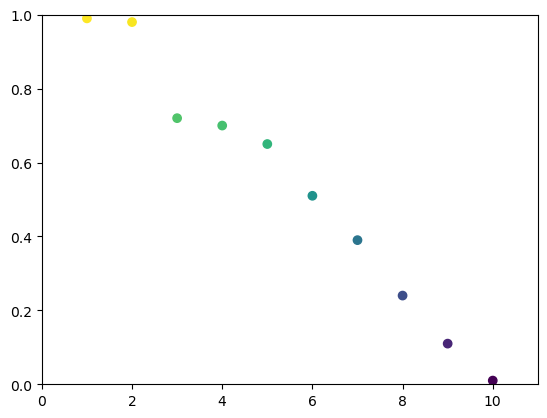

In [4]:
#fig, ax = plt.subplots(1, 1)
x = [1,2,3,4,5,6,7,8,9,10]
plt.xlim(0, 11)
plt.ylim(0,1)
plt.scatter(x, y_pred_proba, c = y_pred_proba)#, 'r', alpha=0.6)
plt.show()

Podemos implementar una **Clasificación binaria determinista** mediante un umbral para decidir la clasificación correcta:

In [14]:
threshold = 0.5

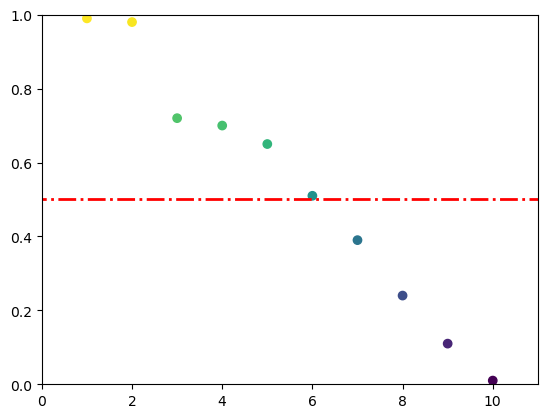

In [15]:
x = [1,2,3,4,5,6,7,8,9,10]
plt.xlim(0, 11)
plt.ylim(0,1)
plt.scatter(x, y_pred_proba, c = y_pred_proba)#, 'r', alpha=0.6)
plt.axhline(y=threshold, xmin=-3, xmax=3, color='red', linestyle='-.', linewidth=2)
plt.show()

Con ese umbral quedarían los siguientes valores:

In [16]:
y_pred = (y_pred_proba >= threshold).astype(int)
y_pred

array([1, 1, 1, 1, 1, 1, 0, 0, 0, 0])

**Clasificación multiclase determinista:**

Por otro lado definimos otro dataset con multiples clases:

In [11]:
y_true2 = ["cat", "ant", "cat", "cat", "ant", "bird"]

Mediante el uso de un clasificador obtuvimos las siguientes clases:

In [12]:
y_pred2 = ["ant", "ant", "cat", "cat", "ant", "cat"]

## Precision, Recall y F1

La precision es la proporción de positivos propuestos por el modelo que fueron correctos:

$$Precision = \frac{|Etiquetado(+) \cap Clasificado(+)|}{|Clasificado(+)|} = \frac{TP}{TP + FP}$$

La recall es la proporción de positivos correctos que fueron encontrados por el modelo:

$$Recall = \frac{|Etiquetado(+) \cap Clasificado(+)|}{|Etiquetado(+)|} = \frac{TP}{TP + FN}$$

$$F_1 = \frac{2 * Precision * Recall}{Precision + Recall}$$

Para clasificación multiclase, se puede calcular una métrica por clase. Luego, las métricas se pueden promediar para obtener resultados "macro".
Para obtener resultados "micro", se hacen primero cálculos globales para TP, FP, TN, FN y luego se calcula como un problema binario.

Podemos usar sklearn para calcularlas:

In [17]:
y_true, y_pred

(array([1, 1, 0, 1, 1, 0, 0, 1, 0, 0]), array([1, 1, 1, 1, 1, 1, 0, 0, 0, 0]))

In [29]:
threshold = 0.5
y_pred = (y_pred_proba >= threshold).astype(int)
y_pred

array([1, 1, 1, 1, 1, 1, 0, 0, 0, 0])

In [30]:
from sklearn.metrics import precision_score
precision_score(y_true, y_pred)  # precision = 4 / 6 (con th=0.5), = 2 / 2 (con th=0.8)

0.6666666666666666

In [31]:
from sklearn.metrics import recall_score
recall_score(y_true, y_pred)  # recall = 4 / 5 (con th=0.5), = 2 / 5 (con th=0.8)

0.8

In [32]:
from sklearn.metrics import f1_score
f1_score(y_true, y_pred)

0.7272727272727273

## Reporte de Clasificación

- [classification_report](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html)

En clasificación binaria:

In [33]:
y_true, y_pred

(array([1, 1, 0, 1, 1, 0, 0, 1, 0, 0]), array([1, 1, 1, 1, 1, 1, 0, 0, 0, 0]))

In [36]:
from sklearn.metrics import classification_report
classification_report??
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.60      0.67         5
           1       0.67      0.80      0.73         5

    accuracy                           0.70        10
   macro avg       0.71      0.70      0.70        10
weighted avg       0.71      0.70      0.70        10



En clasificación multiclase:

In [35]:
y_true2, y_pred2

(['cat', 'ant', 'cat', 'cat', 'ant', 'bird'],
 ['ant', 'ant', 'cat', 'cat', 'ant', 'cat'])

In [37]:
print(classification_report(y_true2, y_pred2))

              precision    recall  f1-score   support

         ant       0.67      1.00      0.80         2
        bird       0.00      0.00      0.00         1
         cat       0.67      0.67      0.67         3

    accuracy                           0.67         6
   macro avg       0.44      0.56      0.49         6
weighted avg       0.56      0.67      0.60         6



/usr/lib/python3/dist-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/lib/python3/dist-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/lib/python3/dist-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## Matrices de Confusión

Usamos [confusion_matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html):


In [38]:
from sklearn.metrics import confusion_matrix

Retomamos las etiquetas originales y las predicha por clasificador binario:

In [39]:
y_true, y_pred

(array([1, 1, 0, 1, 1, 0, 0, 1, 0, 0]), array([1, 1, 1, 1, 1, 1, 0, 0, 0, 0]))

Mediante la función  "confusion_matrix" podemos obtener las cantidades de TP, FP, TN y FN

In [40]:
confusion_matrix(y_true, y_pred)

array([[3, 2],
       [1, 4]])

In [41]:
tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()

En multiclase:

In [42]:
cm = confusion_matrix(y_true2, y_pred2, labels=['ant', 'bird', 'cat'])
cm

array([[2, 0, 0],
       [0, 0, 1],
       [1, 0, 2]])

Podemos usar [plot_confusion_matrix](https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html) pero requiere el clasificador. Definimos nuestra propia versión:

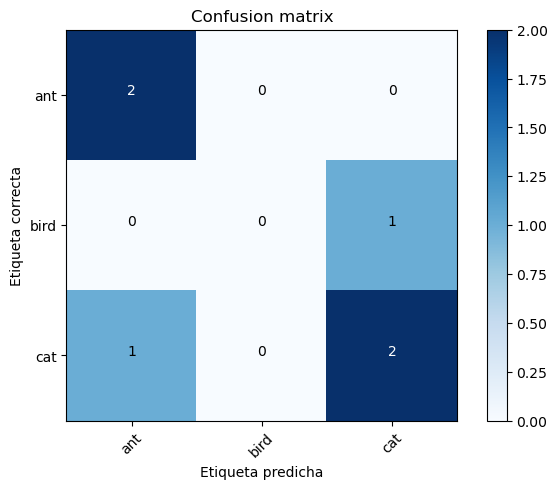

In [43]:
from utils import plot_confusion_matrix

plot_confusion_matrix(cm, ['ant', 'bird', 'cat'])

## Curvas ROC

Usamos [roc_curve](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html) para obtener los puntos y graficamos:

In [44]:
from sklearn.metrics import roc_curve
fpr, tpr, threshold = roc_curve(y_true, y_pred_proba, drop_intermediate=True)

In [45]:
fpr, tpr, threshold

(array([0. , 0. , 0. , 0.2, 0.2, 0.6, 0.6, 1. ]),
 array([0. , 0.2, 0.4, 0.4, 0.8, 0.8, 1. , 1. ]),
 array([ inf, 0.99, 0.98, 0.72, 0.65, 0.39, 0.24, 0.01]))

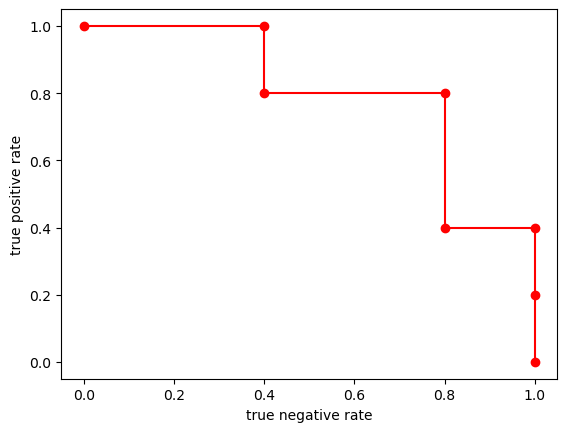

In [46]:
plt.plot(1.0 - fpr, tpr, color="red")
plt.scatter(1.0 - fpr, tpr, color="red")
#plt.xlabel("false positive rate")
plt.xlabel("true negative rate")
plt.ylabel("true positive rate")
plt.show()

In [47]:
tpr[3], fpr[3], threshold[3]

(0.4, 0.2, 0.72)

Calculamos el área bajo la curva con [roc_auc_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html):

In [48]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_true, y_pred_proba)

0.8

Veamos con otros resultados:

In [49]:
y_true_2 = np.array([0, 0, 1, 0, 0, 0, 0, 1, 1, 0])
y_pred_proba_2 = np.array([.89, .78, .65, .55, .54, .51, .49, .34, .11, .01])

In [50]:
fpr_2, tpr_2, threshold_2 = roc_curve(y_true_2, y_pred_proba_2, drop_intermediate=True)

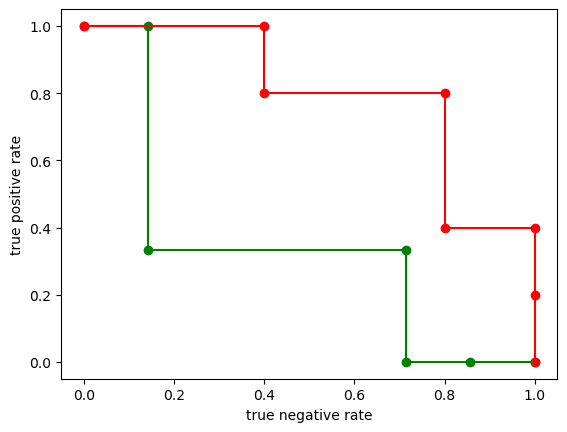

In [52]:
plt.plot(1.0 - fpr_2, tpr_2, color="green")
plt.scatter(1.0 - fpr_2, tpr_2, color="green")
plt.plot(1.0 - fpr, tpr, color="red")
plt.scatter(1.0 - fpr, tpr, color="red")
#plt.xlabel("false positive rate")
plt.xlabel("true negative rate")
plt.ylabel("true positive rate")
plt.show()

In [53]:
tpr_2[4], fpr_2[4], threshold_2[4]

(0.3333333333333333, 0.8571428571428571, 0.49)

In [54]:
roc_auc_score(y_true_2, y_pred_proba_2)

0.33333333333333337

## Curvas PR (Precision/Recall)

Usamos [precision_recall_curve](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_recall_curve.html) para obtener los puntos y graficamos:

In [55]:
from sklearn.metrics import precision_recall_curve
precision, recall, threshold = precision_recall_curve(y_true, y_pred_proba)

In [56]:
precision, recall, threshold

(array([0.5       , 0.55555556, 0.625     , 0.57142857, 0.66666667,
        0.8       , 0.75      , 0.66666667, 1.        , 1.        ,
        1.        ]),
 array([1. , 1. , 1. , 0.8, 0.8, 0.8, 0.6, 0.4, 0.4, 0.2, 0. ]),
 array([0.01, 0.11, 0.24, 0.39, 0.51, 0.65, 0.7 , 0.72, 0.98, 0.99]))

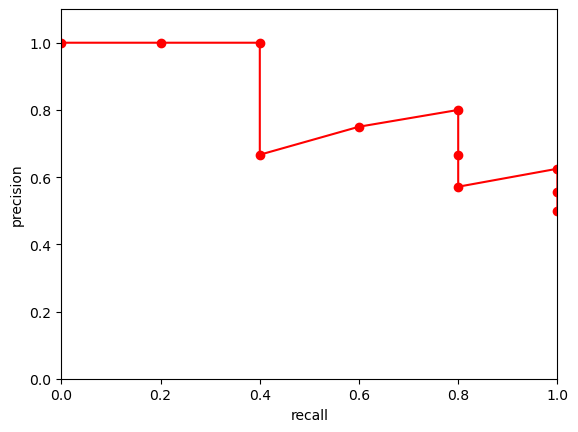

In [57]:
plt.xlim(0, 1)
plt.ylim(0, 1.1)
plt.plot(recall, precision, color="red")
plt.scatter(recall, precision, color="red")
plt.xlabel("recall")
plt.ylabel("precision")
plt.show()

## Referencias


Scikit-learn:

- [3.4. Metrics and scoring: quantifying the quality of predictions](https://scikit-learn.org/stable/modules/model_evaluation.html)